# 04. Enhanced Classification with Neural Networks 🎯

Welcome to the **enhanced world of classification**! 🚀

This notebook expands on binary classification with comprehensive metrics, confusion matrices, ROC curves, and introduces multi-class classification with MNIST.

## 🎯 Enhanced Learning Objectives

By the end of this notebook, you'll master:

- **Binary classification** with comprehensive evaluation metrics
- **Confusion matrix** analysis and interpretation
- **ROC curves and AUC** for model comparison
- **Precision, Recall, and F1-score** understanding
- **Multi-class classification** with MNIST dataset
- **Class imbalance** handling techniques
- **Decision boundary** evolution visualization

## 🧩 What You'll Build

- **Enhanced binary classifier** with full metrics suite
- **Confusion matrix visualizer** for detailed analysis
- **ROC curve plotter** for model comparison
- **Multi-class MNIST classifier** with softmax
- **Class imbalance handler** with weighted loss
- **Interactive decision boundary** viewer

## 🌍 Real-World Enhanced Classification

| Application           | Metrics Focus       | Why Important                     |
| --------------------- | ------------------- | --------------------------------- |
| **Medical Diagnosis** | Recall, Specificity | Minimize false negatives          |
| **Fraud Detection**   | Precision, F1       | Balance false positives/negatives |
| **Image Recognition** | Top-k Accuracy, AUC | Multi-class performance           |
| **Email Filtering**   | Precision, ROC-AUC  | User experience optimization      |
| **Quality Control**   | Confusion Matrix    | Detailed error analysis           |

Let's dive into comprehensive classification! 🏊‍♂️


## 📊 Enhanced Imports and Setup

We'll use additional libraries for comprehensive metrics and visualizations.


In [1]:
# Essential imports for enhanced classification
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    classification_report,
)
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔥 Using device: {device}")

print("✅ All imports successful!")
print("🎯 Ready for enhanced classification adventure!")

🔥 Using device: cpu
✅ All imports successful!
🎯 Ready for enhanced classification adventure!


## 🎲 Enhanced Data Generation and Analysis

Let's create our binary classification dataset with detailed analysis.


In [3]:
# Parameters for our dataset
n_samples = 1000
noise_level = 0.1
random_state = 42

# Generate two interleaved circles
X, y = make_circles(n_samples=n_samples, noise=noise_level, random_state=random_state)

# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=random_state, stratify=y
)

print("📊 Dataset Statistics:")
print(f"  Total samples: {n_samples}")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")
print(f"  Features: {X.shape[1]}")
print(f"  Classes: {len(np.unique(y))}")

# Class distribution analysis
unique, counts = np.unique(y, return_counts=True)
print("\n📈 Class Distribution:")
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y)*100:.1f}%)")

📊 Dataset Statistics:
  Total samples: 1000
  Training samples: 800
  Test samples: 200
  Features: 2
  Classes: 2

📈 Class Distribution:
  Class 0: 500 samples (50.0%)
  Class 1: 500 samples (50.0%)


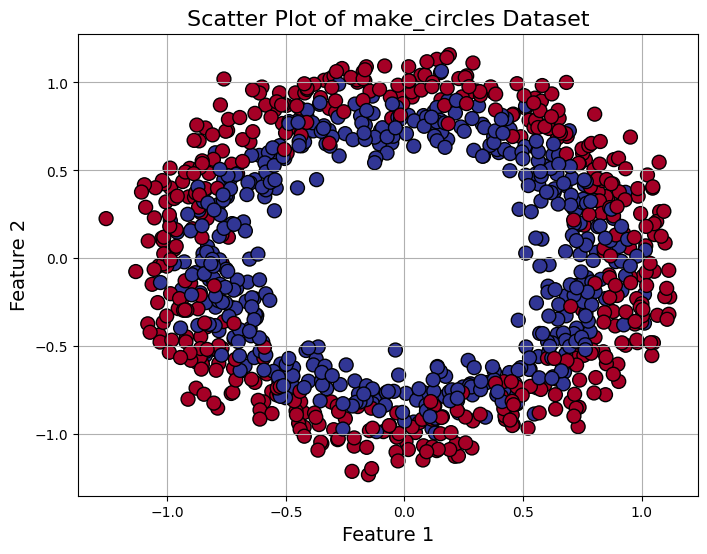

In [4]:
# Visualize the dataset

plt.figure(figsize=(8, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="k", s=100)
plt.title("Scatter Plot of make_circles Dataset", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(True)
plt.show()

## 🧠 Enhanced Model Architecture

Let's create both linear and non-linear models to demonstrate the difference.


In [5]:
class LinearClassifier(nn.Module):
    """
    Simple linear classifier for comparison
    """

    def __init__(self, input_features=2, output_features=1):
        super().__init__()
        self.linear = nn.Linear(input_features, output_features)

    def forward(self, x):
        return self.linear(x)


class NonLinearClassifier(nn.Module):
    """
    Enhanced non-linear classifier with dropout for regularization
    """

    def __init__(
        self, input_features=2, hidden_units=20, output_features=1, dropout_rate=0.1
    ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units, hidden_units // 2),
            nn.ReLU(),
            nn.Linear(hidden_units // 2, output_features),
        )

    def forward(self, x):
        return self.layer_stack(x)


# Create both models
linear_model = LinearClassifier().to(device)
nonlinear_model = NonLinearClassifier().to(device)

print("🧠 Model Architectures Created:")
print(
    f"📏 Linear Model Parameters: {sum(p.numel() for p in linear_model.parameters()):,}"
)
print(
    f"🌐 Non-Linear Model Parameters: {sum(p.numel() for p in nonlinear_model.parameters()):,}"
)

# Display model architectures
print("\n📐 Linear Model Architecture:")
print(linear_model)
print("\n🌊 Non-Linear Model Architecture:")
print(nonlinear_model)

🧠 Model Architectures Created:
📏 Linear Model Parameters: 3
🌐 Non-Linear Model Parameters: 701

📐 Linear Model Architecture:
LinearClassifier(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

🌊 Non-Linear Model Architecture:
NonLinearClassifier(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=20, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=1, bias=True)
  )
)


## 📊 Enhanced Evaluation Metrics

Let's create comprehensive evaluation functions.


In [6]:
def enhanced_accuracy_fn(y_true, y_pred):
    """Enhanced accuracy calculation with additional info"""
    correct = torch.eq(y_true, y_pred).sum().item()
    total = len(y_pred)
    accuracy = (correct / total) * 100
    return accuracy, correct, total

In [7]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", figsize=(18, 12)):
    """Plot enhanced confusion matrix with detailed statistics"""
    # Convert to numpy if tensors
    if torch.is_tensor(y_true):
        y_true = y_true.cpu().numpy()
    if torch.is_tensor(y_pred):
        y_pred = y_pred.cpu().numpy()

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure with 3 subplots
    _, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2, figsize=figsize)

    # Plot confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=ax1,
        xticklabels=["Class 0", "Class 1"],
        yticklabels=["Class 0", "Class 1"],
    )
    ax1.set_title(f"{title}\nRaw Counts")
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("Actual")

    # Plot normalized confusion matrix
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(
        cm_norm,
        annot=True,
        fmt=".2%",
        cmap="Blues",
        ax=ax2,
        xticklabels=["Class 0", "Class 1"],
        yticklabels=["Class 0", "Class 1"],
    )
    ax2.set_title(f"{title}\nNormalized (%)")
    ax2.set_xlabel("Predicted")
    ax2.set_ylabel("Actual")

    # Calculate detailed metrics
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = (
        2 * (precision * recall) / (precision + recall)
        if (precision + recall) > 0
        else 0
    )

    # Plot performance metrics as a bar chart
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1-Score": f1,
    }

    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    # Create bar chart
    bars = ax3.bar(
        metric_names,
        metric_values,
        color=["#2ecc71", "#3498db", "#9b59b6", "#e74c3c", "#f39c12"],
        alpha=0.8,
        edgecolor="black",
    )

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.2%}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    ax3.set_ylabel("Score", fontsize=12)
    ax3.set_title("Performance Metrics", fontsize=14, fontweight="bold")
    ax3.set_ylim(0, 1.1)
    ax3.grid(axis="y", alpha=0.3, linestyle="--")
    ax3.set_axisbelow(True)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

    return cm, {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "f1": f1,
    }

In [8]:
def plot_roc_curve(y_true, y_proba, title="ROC Curve", figsize=(12, 5)):
    """Plot ROC curve and Precision-Recall curve"""
    # Convert to numpy if tensors
    if torch.is_tensor(y_true):
        y_true = y_true.cpu().numpy()
    if torch.is_tensor(y_proba):
        y_proba = y_proba.cpu().numpy()

    # Calculate ROC curve
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    avg_precision = average_precision_score(y_true, y_proba)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Plot ROC curve
    ax1.plot(
        fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})"
    )
    ax1.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", alpha=0.5)
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title(f"{title} - ROC Curve")
    ax1.legend(loc="lower right")
    ax1.grid(True, alpha=0.3)

    # Plot Precision-Recall curve
    ax2.plot(
        recall,
        precision,
        color="blue",
        lw=2,
        label=f"PR curve (AP = {avg_precision:.3f})",
    )
    ax2.axhline(
        y=y_true.mean(),
        color="red",
        linestyle="--",
        alpha=0.5,
        label=f"Baseline ({y_true.mean():.3f})",
    )
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel("Recall")
    ax2.set_ylabel("Precision")
    ax2.set_title(f"{title} - Precision-Recall Curve")
    ax2.legend(loc="lower left")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("📈 ROC Analysis:")
    print(f"  AUC-ROC: {roc_auc:.4f} (0.5=random, 1.0=perfect)")
    print(f"  Average Precision: {avg_precision:.4f}")

    # Find optimal threshold (Youden's J statistic)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = roc_thresholds[optimal_idx]
    print(f"  Optimal Threshold: {optimal_threshold:.4f}")
    print(f"  At optimal: TPR={tpr[optimal_idx]:.3f}, FPR={fpr[optimal_idx]:.3f}")

    return roc_auc, avg_precision, optimal_threshold

In [9]:
def comprehensive_model_evaluation(model, X_test, y_test, title="Model Evaluation"):
    """Comprehensive evaluation of a model"""
    model.eval()
    with torch.inference_mode():
        # Get predictions
        logits = model(X_test.to(device)).squeeze()
        probabilities = torch.sigmoid(logits)
        predictions = torch.round(probabilities)

        # Move to CPU for sklearn metrics
        y_test_cpu = y_test.cpu()
        probabilities_cpu = probabilities.cpu()
        predictions_cpu = predictions.cpu()

        print(f"🔍 {title}")
        print("=" * 50)

        # Basic accuracy
        accuracy, correct, total = enhanced_accuracy_fn(y_test_cpu, predictions_cpu)
        print(f"✅ Accuracy: {accuracy:.2f}% ({correct}/{total})")

        # Confusion Matrix
        cm, metrics = plot_confusion_matrix(y_test_cpu, predictions_cpu, title)

        # ROC Curve
        roc_auc, avg_precision, optimal_threshold = plot_roc_curve(
            y_test_cpu, probabilities_cpu, title
        )

        return {
            "accuracy": accuracy,
            "confusion_matrix": cm,
            "metrics": metrics,
            "roc_auc": roc_auc,
            "avg_precision": avg_precision,
            "optimal_threshold": optimal_threshold,
            "probabilities": probabilities_cpu,
            "predictions": predictions_cpu,
        }


print("📊 Enhanced evaluation functions created!")
print("🎯 Ready to evaluate models comprehensively!")

📊 Enhanced evaluation functions created!
🎯 Ready to evaluate models comprehensively!


## 🏃‍♂️ Enhanced Training Function

Let's create a comprehensive training function with progress tracking.


In [10]:
def train_enhanced_model(
    model, X_train, y_train, X_test, y_test, epochs=1000, lr=0.1, print_every=100
):
    """Enhanced training function with comprehensive logging"""

    # Setup loss function and optimizer
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    # Move data to device
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    # Training history
    history = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    print(f"🚀 Starting training for {epochs} epochs...")
    print(f"📊 Model: {model.__class__.__name__}")
    print(f"⚙️  Optimizer: Adam (lr={lr})")
    print("🎯 Loss: BCEWithLogitsLoss")
    print("-" * 60)

    for epoch in range(epochs):
        # Training mode
        model.train()

        # Forward pass
        train_logits = model(X_train).squeeze()
        train_probs = torch.sigmoid(train_logits)
        train_preds = torch.round(train_probs)

        # Calculate loss and accuracy
        train_loss = loss_fn(train_logits, y_train)
        train_acc, _, _ = enhanced_accuracy_fn(y_train, train_preds)

        # Backward pass
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Evaluation mode
        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test).squeeze()
            test_probs = torch.sigmoid(test_logits)
            test_preds = torch.round(test_probs)

            test_loss = loss_fn(test_logits, y_test)
            test_acc, _, _ = enhanced_accuracy_fn(y_test, test_preds)

        # Store history
        history["train_loss"].append(train_loss.item())
        history["train_acc"].append(train_acc)
        history["test_loss"].append(test_loss.item())
        history["test_acc"].append(test_acc)

        # Print progress
        if epoch % print_every == 0:
            print(
                f"Epoch {epoch:4d} | "
                f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:5.2f}% | "
                f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:5.2f}%"
            )

    print("-" * 60)
    print("✅ Training completed!")
    print(f"🎯 Final Test Accuracy: {history['test_acc'][-1]:.2f}%")

    return history


def plot_training_history(history, title="Training History"):
    """Plot training history with enhanced visualizations"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    epochs = range(len(history["train_loss"]))

    # Plot losses
    ax1.plot(
        epochs, history["train_loss"], label="Training Loss", color="blue", alpha=0.7
    )
    ax1.plot(epochs, history["test_loss"], label="Test Loss", color="red", alpha=0.7)
    ax1.set_title(f"{title} - Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracies
    ax2.plot(
        epochs, history["train_acc"], label="Training Accuracy", color="blue", alpha=0.7
    )
    ax2.plot(epochs, history["test_acc"], label="Test Accuracy", color="red", alpha=0.7)
    ax2.set_title(f"{title} - Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy (%)")
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot loss difference (overfitting indicator)
    loss_diff = np.array(history["test_loss"]) - np.array(history["train_loss"])
    ax3.plot(epochs, loss_diff, color="purple", alpha=0.7)
    ax3.axhline(y=0, color="black", linestyle="--", alpha=0.5)
    ax3.set_title("Overfitting Indicator\n(Test Loss - Train Loss)")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Loss Difference")
    ax3.grid(True, alpha=0.3)

    # Plot accuracy difference
    acc_diff = np.array(history["train_acc"]) - np.array(history["test_acc"])
    ax4.plot(epochs, acc_diff, color="orange", alpha=0.7)
    ax4.axhline(y=0, color="black", linestyle="--", alpha=0.5)
    ax4.set_title("Generalization Gap\n(Train Acc - Test Acc)")
    ax4.set_xlabel("Epoch")
    ax4.set_ylabel("Accuracy Difference (%)")
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("📊 Training Summary:")
    print(f"  Final Train Loss: {history['train_loss'][-1]:.4f}")
    print(f"  Final Test Loss:  {history['test_loss'][-1]:.4f}")
    print(f"  Final Train Acc:  {history['train_acc'][-1]:.2f}%")
    print(f"  Final Test Acc:   {history['test_acc'][-1]:.2f}%")
    print(f"  Best Test Acc:    {max(history['test_acc']):.2f}%")
    print(
        f"  Overfitting Gap:  {history['train_acc'][-1] - history['test_acc'][-1]:.2f}%"
    )


print("🏃‍♂️ Enhanced training functions created!")

🏃‍♂️ Enhanced training functions created!


## 🔄 Model Comparison: Linear vs Non-Linear

Let's train both models and compare their performance.


In [11]:
# Train linear model
print("🔵 Training Linear Model")
print("=" * 50)
linear_history = train_enhanced_model(
    linear_model, X_train, y_train, X_test, y_test, epochs=1000, lr=0.1, print_every=200
)

print("\n" + "🔴 Training Non-Linear Model")
print("=" * 50)
nonlinear_history = train_enhanced_model(
    nonlinear_model,
    X_train,
    y_train,
    X_test,
    y_test,
    epochs=1000,
    lr=0.01,
    print_every=200,  # Lower learning rate for stability
)

🔵 Training Linear Model
🚀 Starting training for 1000 epochs...
📊 Model: LinearClassifier
⚙️  Optimizer: Adam (lr=0.1)
🎯 Loss: BCEWithLogitsLoss
------------------------------------------------------------
Epoch    0 | Train Loss: 0.7298 | Train Acc: 49.25% | Test Loss: 0.7142 | Test Acc: 50.00%
Epoch  200 | Train Loss: 0.6931 | Train Acc: 50.38% | Test Loss: 0.6934 | Test Acc: 48.00%
Epoch  400 | Train Loss: 0.6931 | Train Acc: 50.38% | Test Loss: 0.6934 | Test Acc: 48.00%
Epoch  600 | Train Loss: 0.6931 | Train Acc: 50.38% | Test Loss: 0.6934 | Test Acc: 48.00%
Epoch  800 | Train Loss: 0.6931 | Train Acc: 50.38% | Test Loss: 0.6934 | Test Acc: 48.00%
------------------------------------------------------------
✅ Training completed!
🎯 Final Test Accuracy: 48.00%

🔴 Training Non-Linear Model
🚀 Starting training for 1000 epochs...
📊 Model: NonLinearClassifier
⚙️  Optimizer: Adam (lr=0.01)
🎯 Loss: BCEWithLogitsLoss
------------------------------------------------------------
Epoch    0 | 

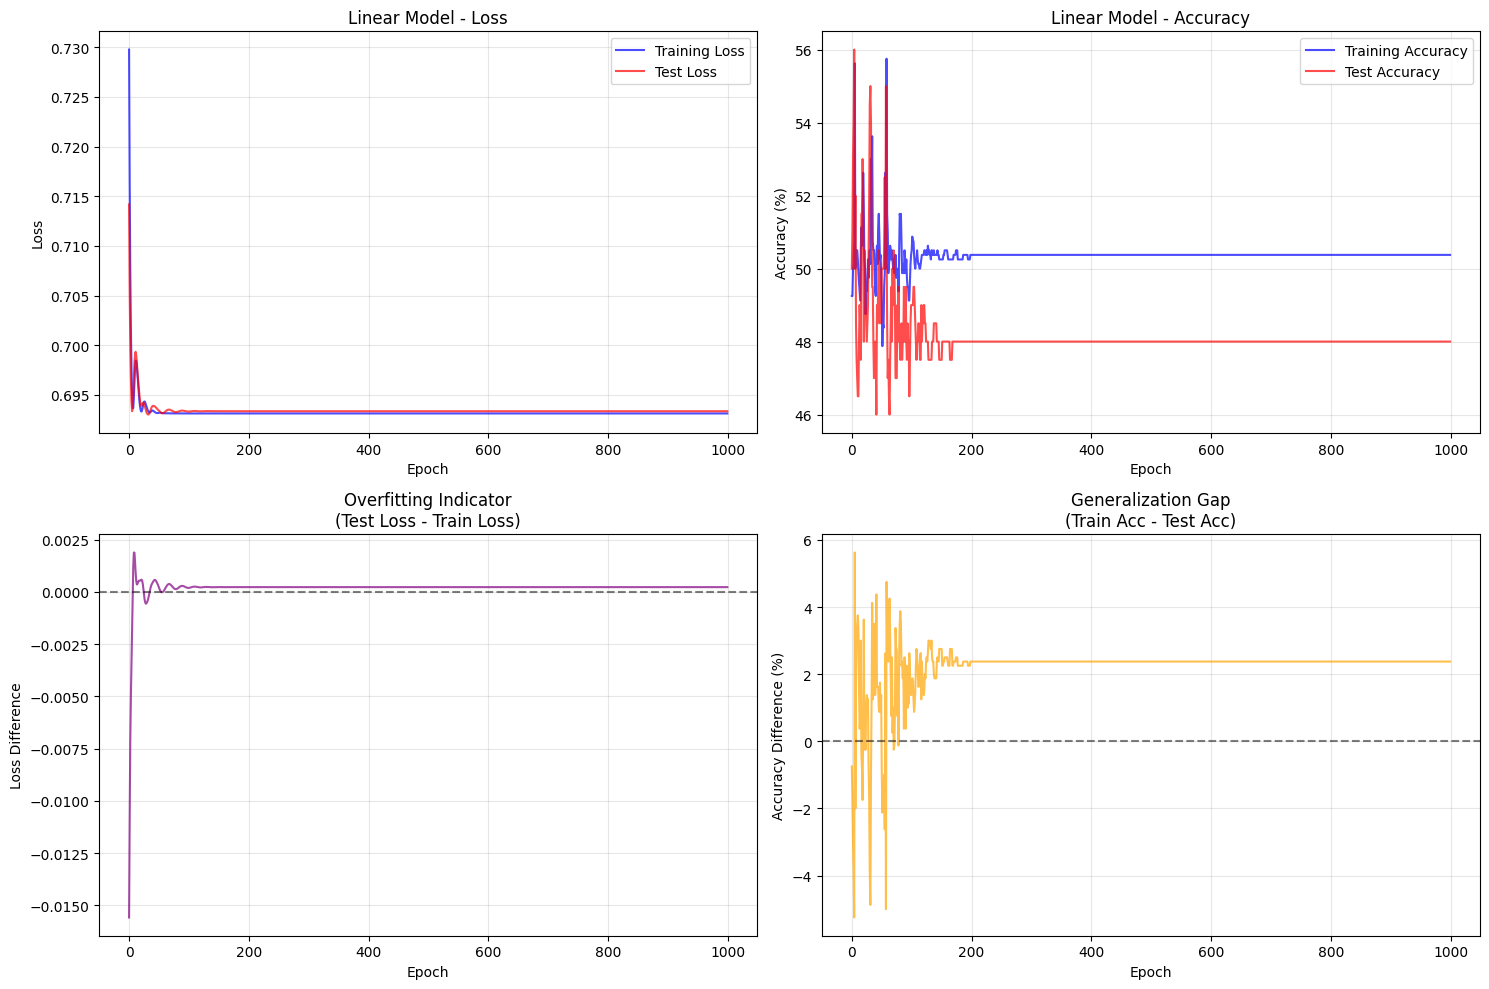

📊 Training Summary:
  Final Train Loss: 0.6931
  Final Test Loss:  0.6934
  Final Train Acc:  50.38%
  Final Test Acc:   48.00%
  Best Test Acc:    56.00%
  Overfitting Gap:  2.38%


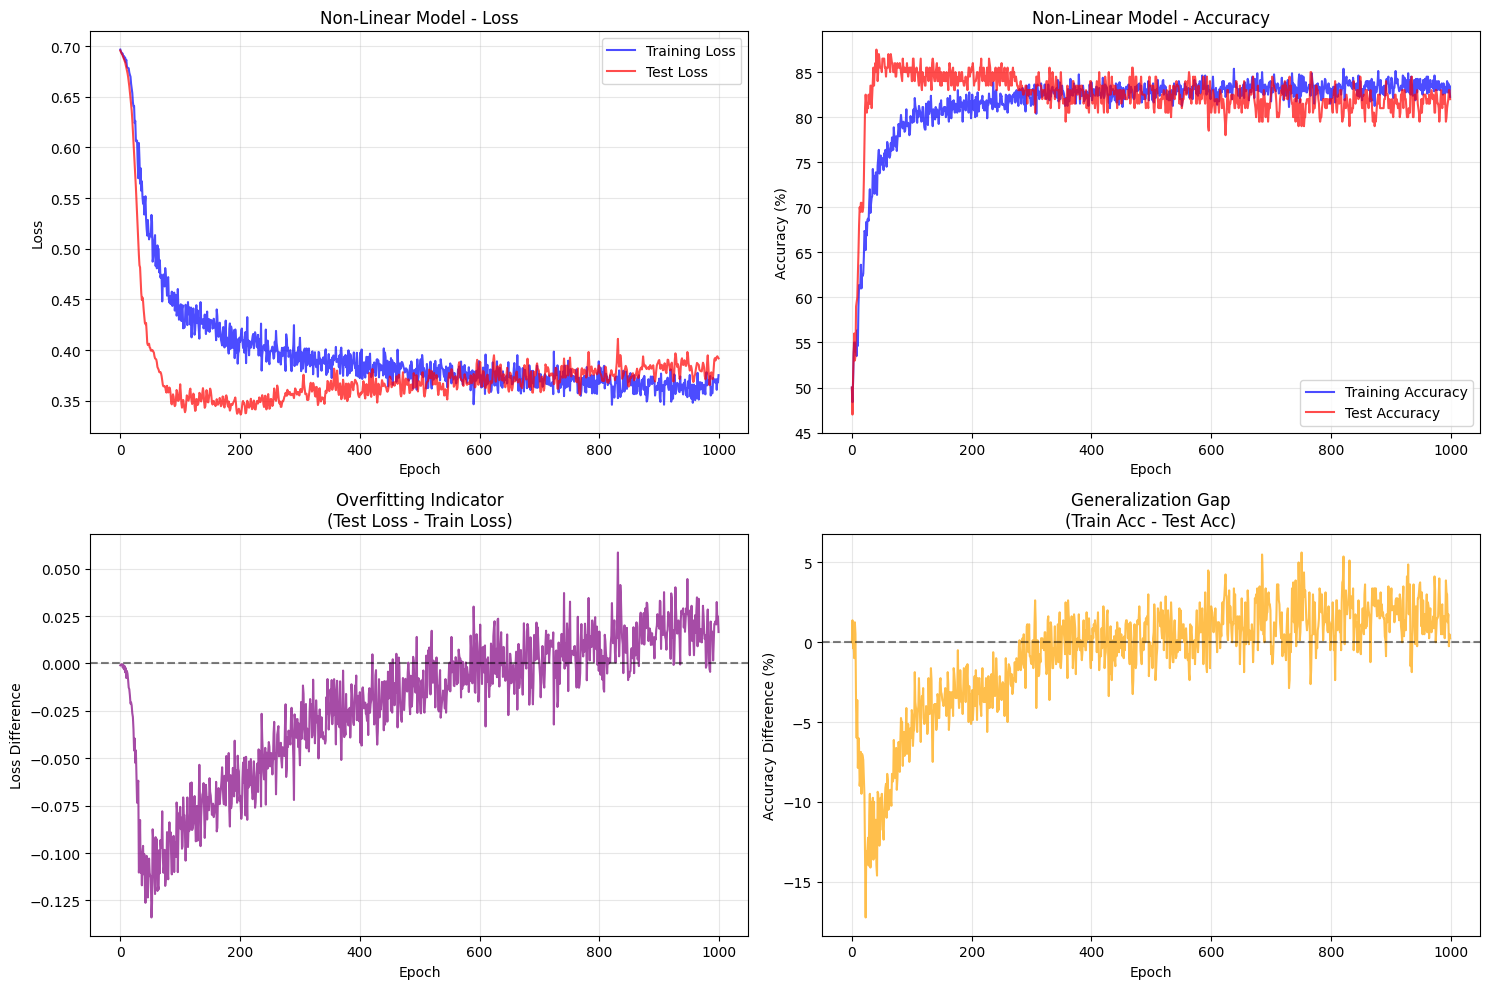

📊 Training Summary:
  Final Train Loss: 0.3754
  Final Test Loss:  0.3919
  Final Train Acc:  82.25%
  Final Test Acc:   82.00%
  Best Test Acc:    87.50%
  Overfitting Gap:  0.25%


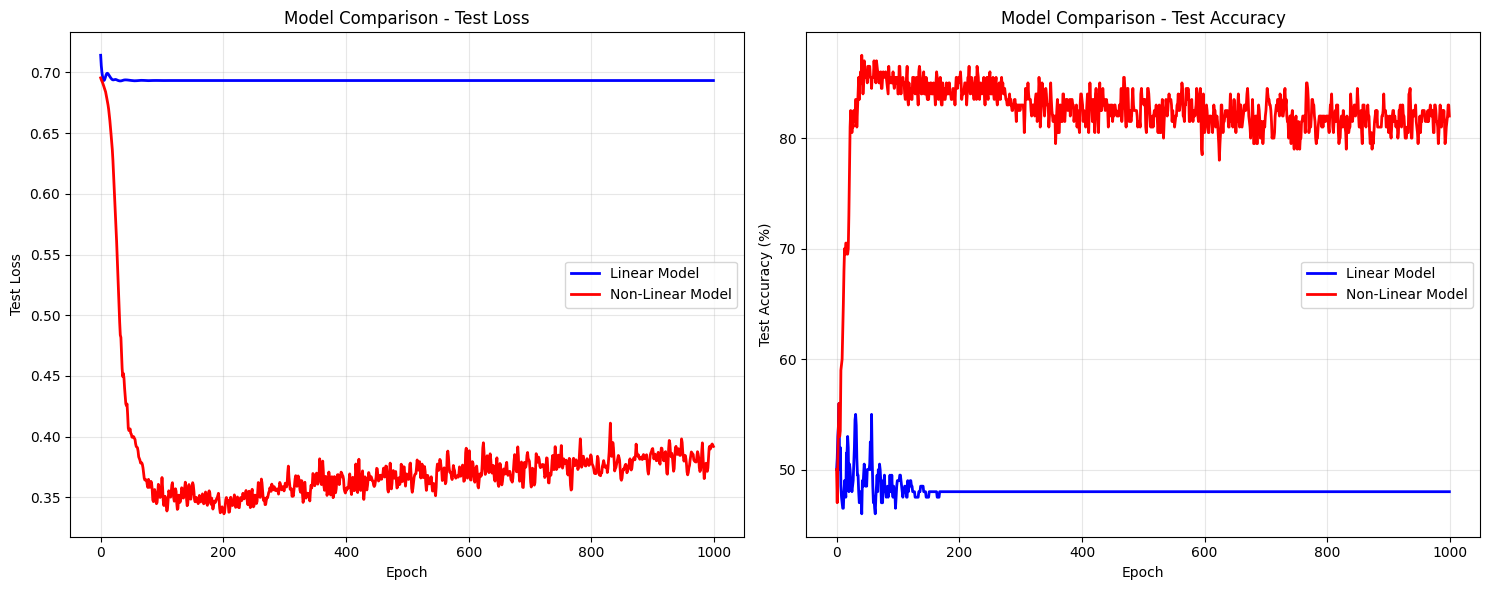

🏆 Model Comparison Summary:
📊 Linear Model Final Test Accuracy:     48.00%
🌊 Non-Linear Model Final Test Accuracy: 82.00%
📈 Performance Improvement: 34.00%


In [12]:
# Plot training histories
plot_training_history(linear_history, "Linear Model")
plot_training_history(nonlinear_history, "Non-Linear Model")

# Compare training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

epochs = range(len(linear_history["train_loss"]))

# Compare losses
ax1.plot(
    epochs, linear_history["test_loss"], label="Linear Model", color="blue", linewidth=2
)
ax1.plot(
    epochs,
    nonlinear_history["test_loss"],
    label="Non-Linear Model",
    color="red",
    linewidth=2,
)
ax1.set_title("Model Comparison - Test Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Test Loss")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Compare accuracies
ax2.plot(
    epochs, linear_history["test_acc"], label="Linear Model", color="blue", linewidth=2
)
ax2.plot(
    epochs,
    nonlinear_history["test_acc"],
    label="Non-Linear Model",
    color="red",
    linewidth=2,
)
ax2.set_title("Model Comparison - Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Test Accuracy (%)")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🏆 Model Comparison Summary:")
print(f"📊 Linear Model Final Test Accuracy:     {linear_history['test_acc'][-1]:.2f}%")
print(
    f"🌊 Non-Linear Model Final Test Accuracy: {nonlinear_history['test_acc'][-1]:.2f}%"
)
print(
    f"📈 Performance Improvement: {nonlinear_history['test_acc'][-1] - linear_history['test_acc'][-1]:.2f}%"
)

## 📊 Comprehensive Model Evaluation

Let's evaluate both models with our comprehensive metrics.


🔍 COMPREHENSIVE EVALUATION
🔍 Linear Model Performance
✅ Accuracy: 48.00% (96/200)


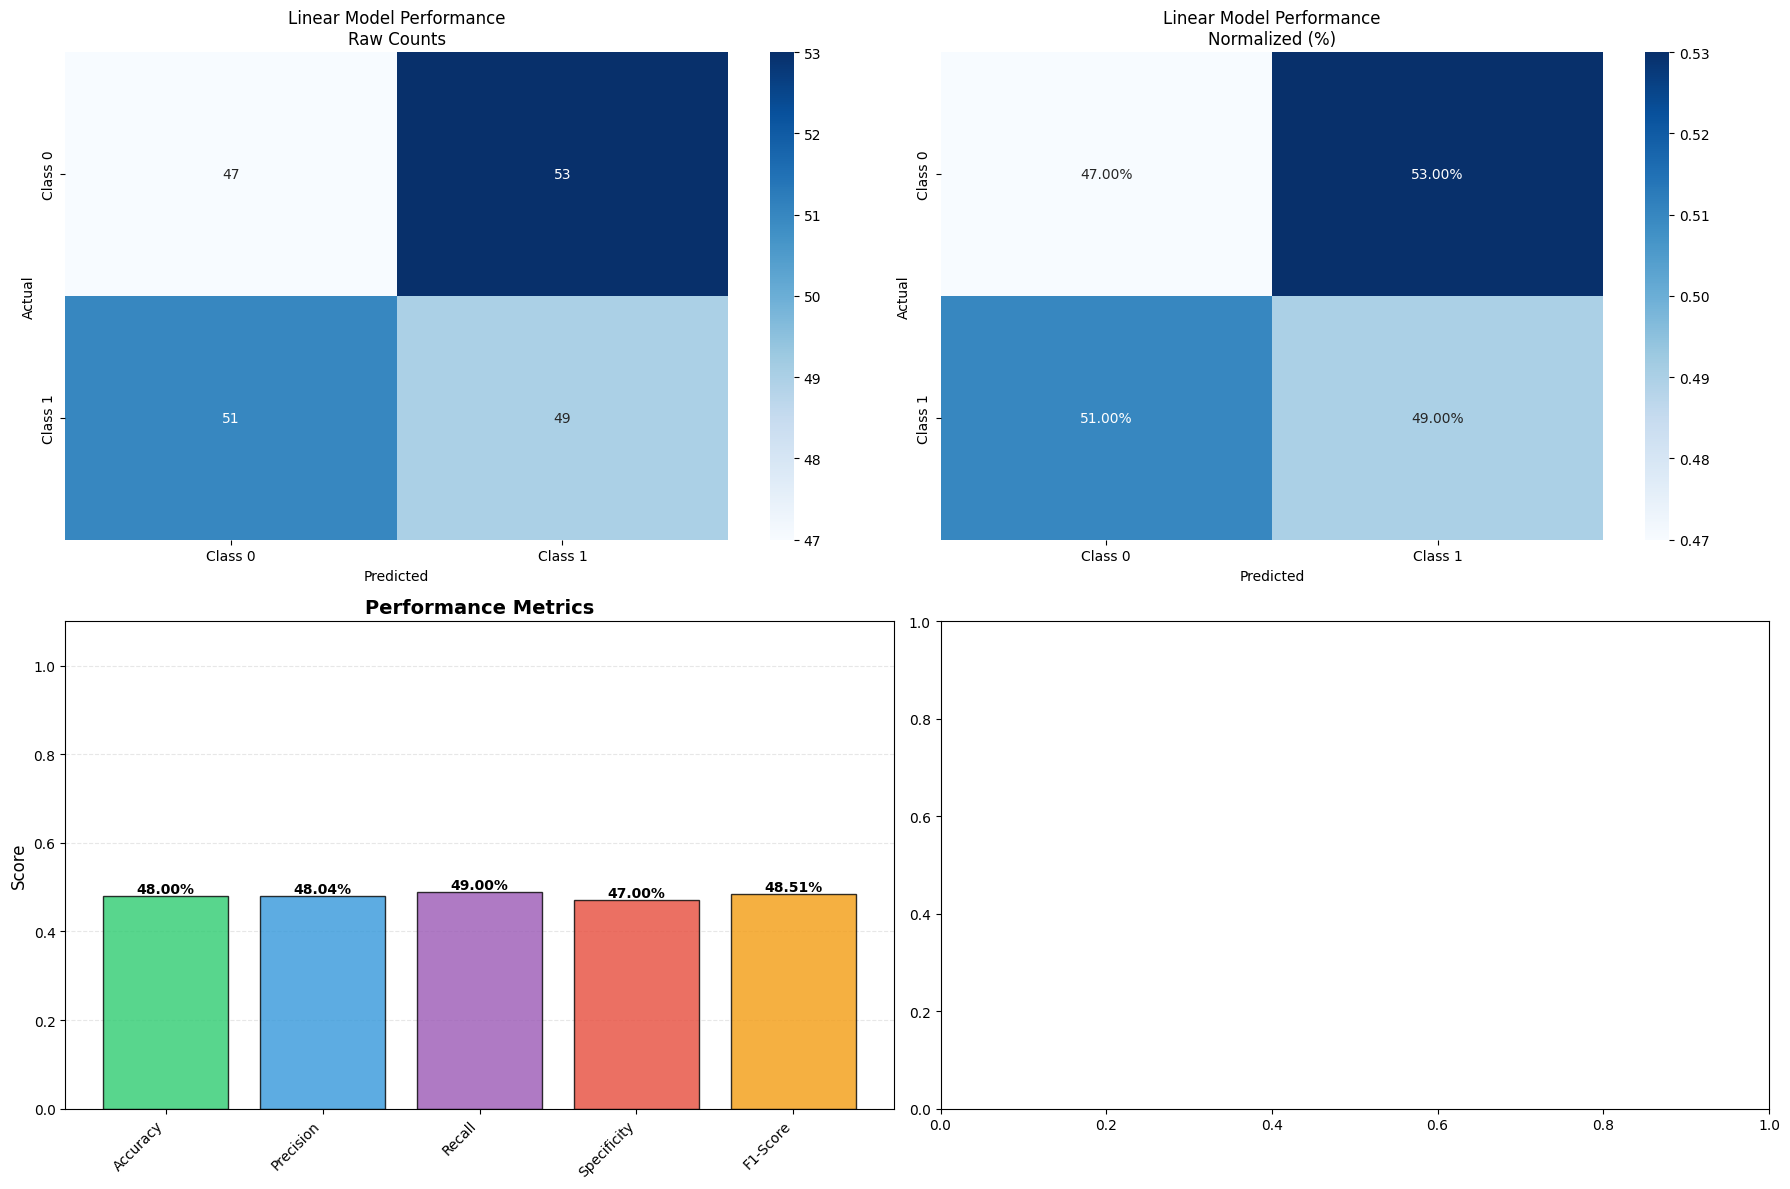

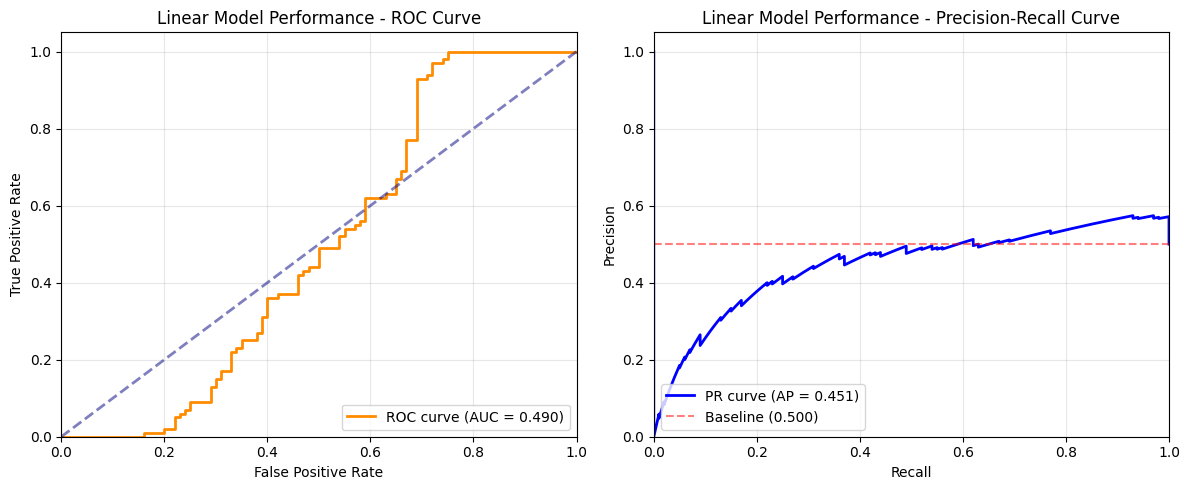

📈 ROC Analysis:
  AUC-ROC: 0.4898 (0.5=random, 1.0=perfect)
  Average Precision: 0.4514
  Optimal Threshold: 0.4962
  At optimal: TPR=0.970, FPR=0.720

🔍 Non-Linear Model Performance
✅ Accuracy: 82.00% (164/200)


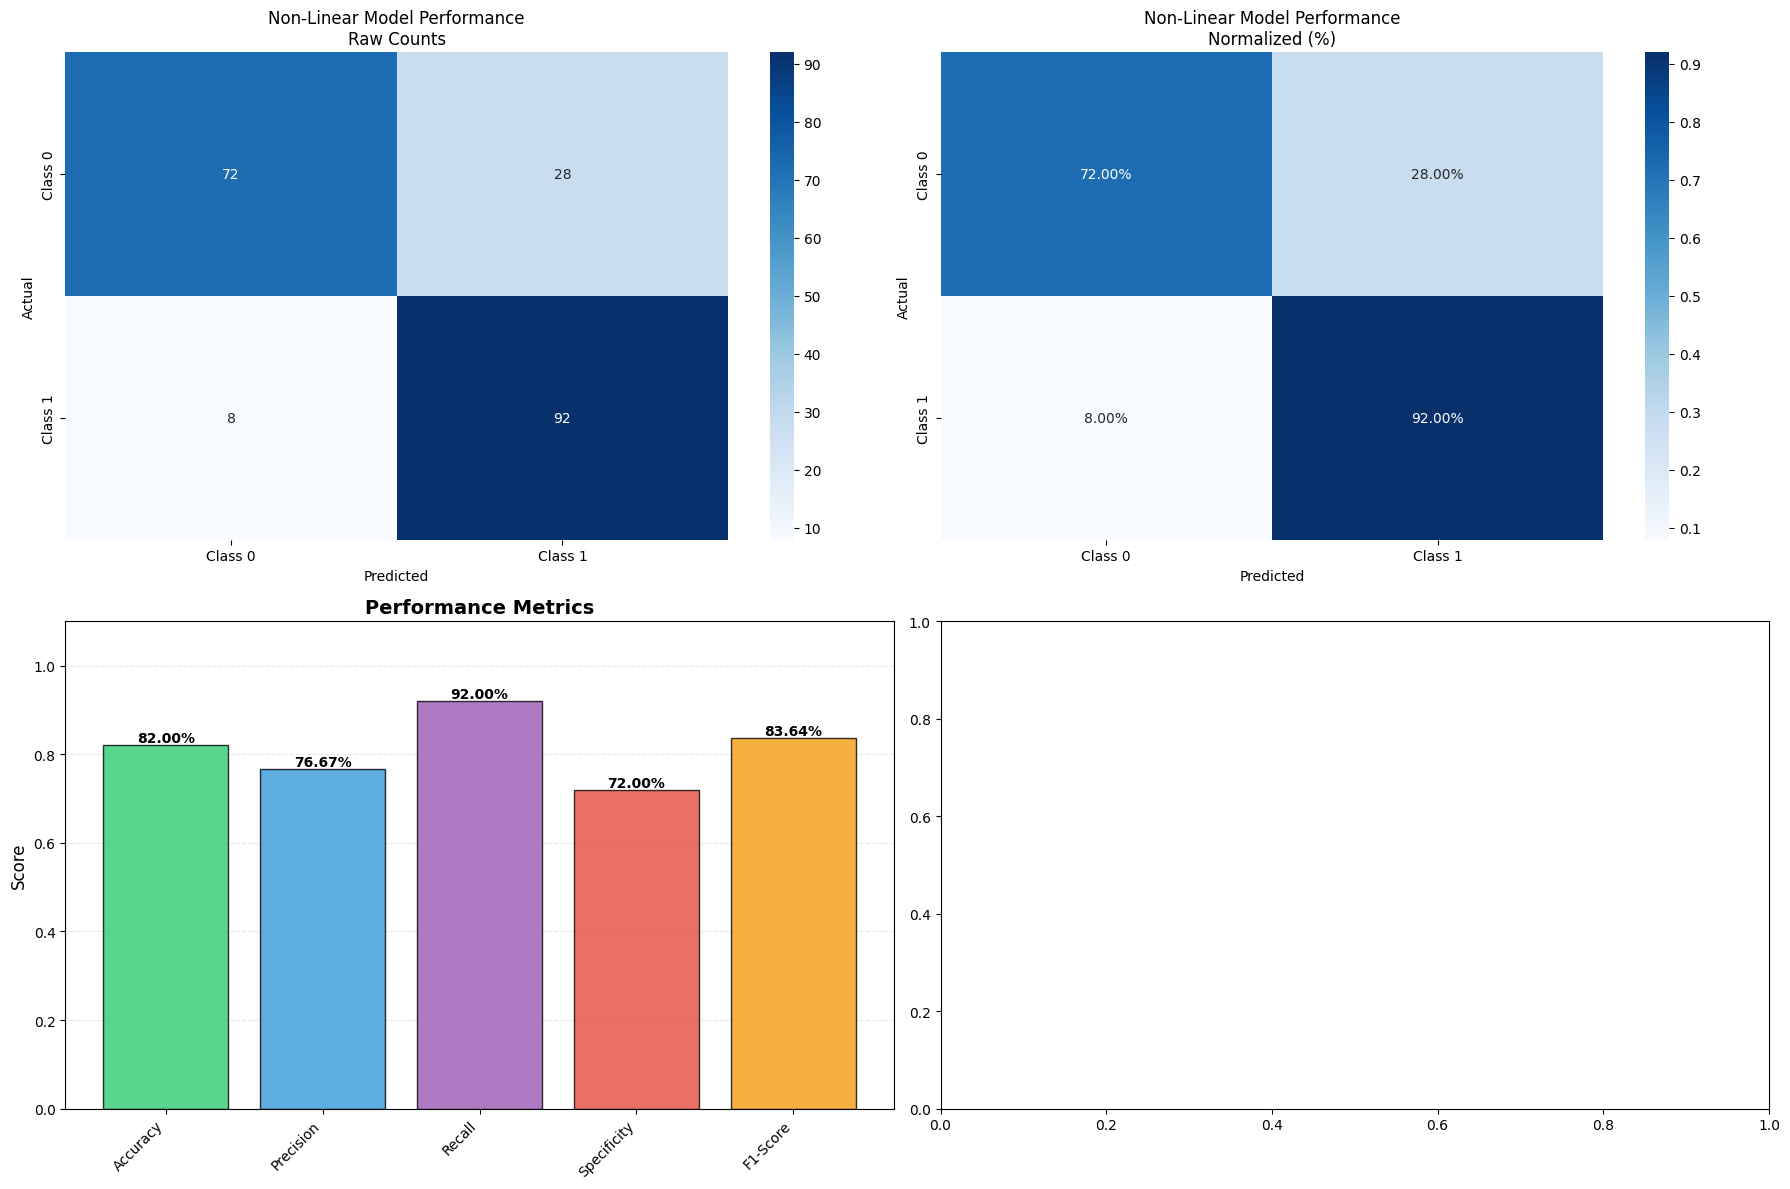

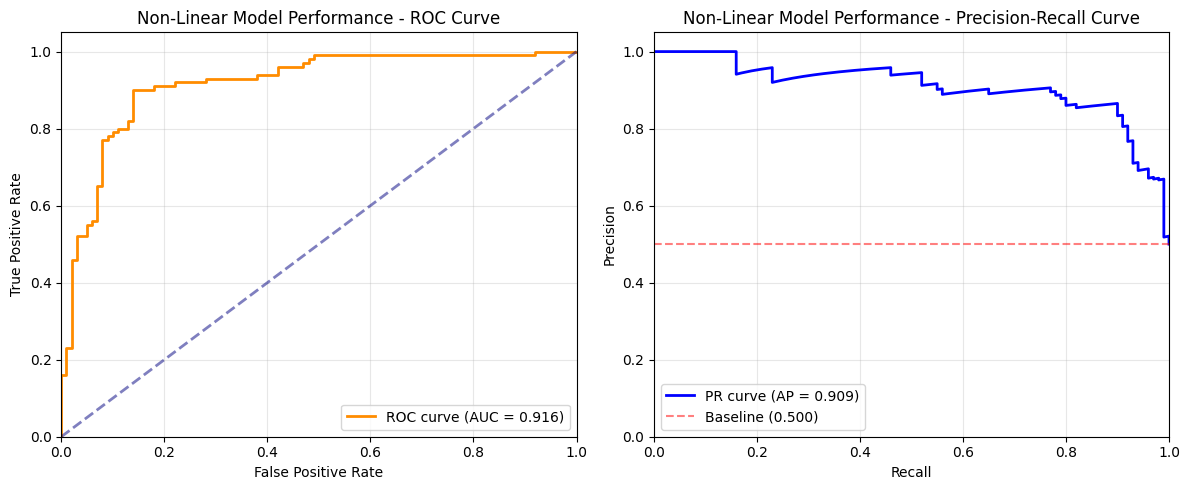

📈 ROC Analysis:
  AUC-ROC: 0.9155 (0.5=random, 1.0=perfect)
  Average Precision: 0.9087
  Optimal Threshold: 0.6301
  At optimal: TPR=0.900, FPR=0.140


In [13]:
# Evaluate linear model
print("🔍 COMPREHENSIVE EVALUATION")
print("=" * 70)

linear_results = comprehensive_model_evaluation(
    linear_model, X_test, y_test, "Linear Model Performance"
)

print("\n" + "=" * 70)

nonlinear_results = comprehensive_model_evaluation(
    nonlinear_model, X_test, y_test, "Non-Linear Model Performance"
)

## 🗺️ Enhanced Decision Boundary Visualization

Let's create an enhanced decision boundary visualization with probability contours.


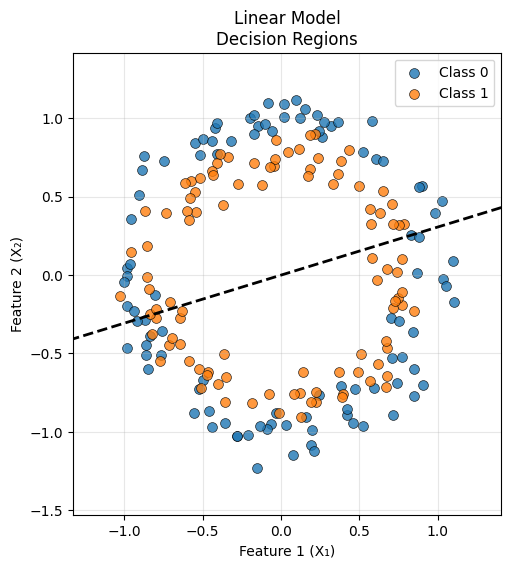

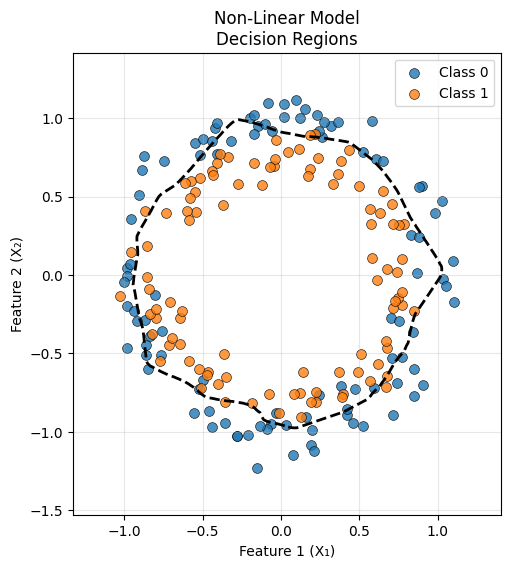

In [14]:
def plot_enhanced_decision_boundary(
    model, X, y, title="Decision Boundary", figsize=(10, 6)
):
    """Enhanced decision boundary with probability contours"""
    # Put everything to CPU
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Make features
    grid_points = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        logits = model(grid_points)
        probabilities = torch.sigmoid(logits)

    # Reshape for plotting
    prob_grid = probabilities.reshape(xx.shape).detach().numpy()

    # Create subplot
    _, (ax1) = plt.subplots(1, 1, figsize=figsize)

    ax1.contour(
        xx, yy, prob_grid, levels=[0.5], colors="black", linewidths=2, linestyles="--"
    )

    for class_idx in range(2):
        mask = y == class_idx
        ax1.scatter(
            X[mask, 0],
            X[mask, 1],
            # c=colors[class_idx],
            s=50,
            alpha=0.8,
            edgecolors="black",
            linewidth=0.5,
            label=f"Class {class_idx}",
        )

    ax1.set_title(f"{title}\nDecision Regions")
    ax1.set_xlabel("Feature 1 (X₁)")
    ax1.set_ylabel("Feature 2 (X₂)")
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect("equal")


# Plot enhanced decision boundaries
plot_enhanced_decision_boundary(linear_model, X_test, y_test, "Linear Model")

plot_enhanced_decision_boundary(nonlinear_model, X_test, y_test, "Non-Linear Model")

## 🎯 Multi-Class Classification with MNIST

Now let's explore multi-class classification using the famous MNIST dataset.


📁 Preparing MNIST Dataset for Multi-Class Classification...


100%|██████████| 9.91M/9.91M [00:09<00:00, 1.05MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 165kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 724kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 116kB/s]


📊 MNIST Dataset Information:
  Training samples: 60,000
  Test samples: 10,000
  Classes: 10
  Image shape: torch.Size([1, 28, 28])
  Batch size: 128


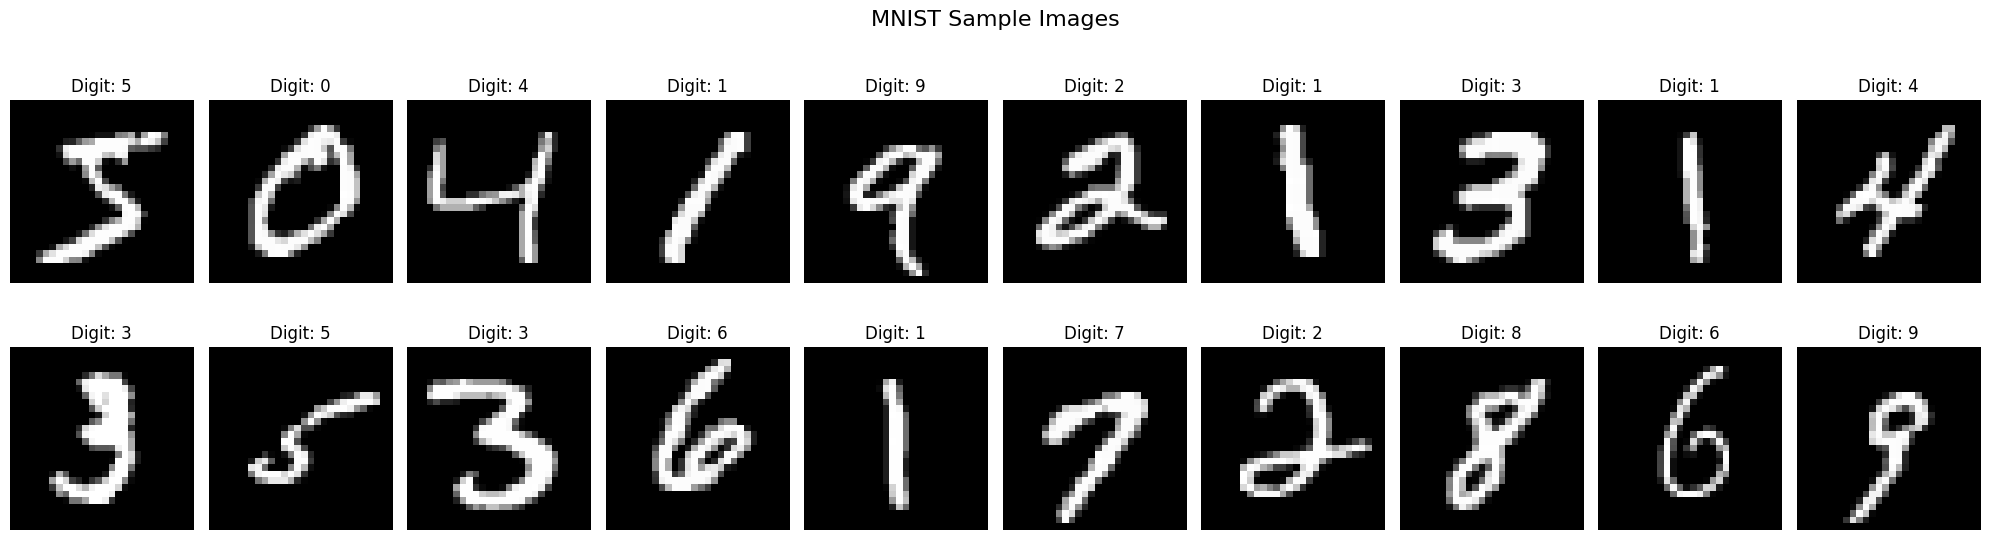

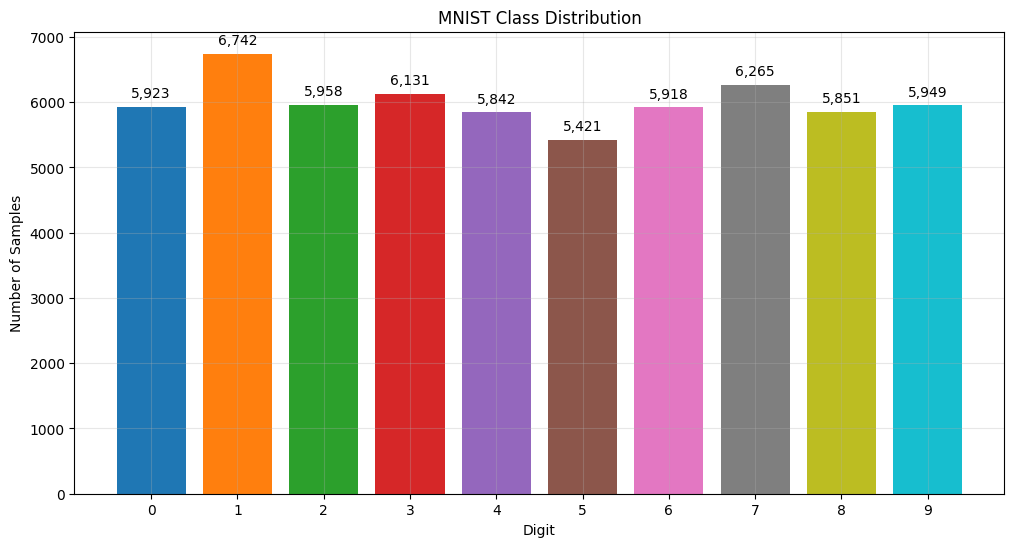

✅ MNIST dataset prepared successfully!


In [15]:
# Download and prepare MNIST dataset
print("📁 Preparing MNIST Dataset for Multi-Class Classification...")

# Data transforms
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),  # MNIST normalization
    ]
)

# Download datasets
train_dataset = datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="data", train=False, download=True, transform=transform
)

# Create data loaders
batch_size = 128
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=2
)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=2
)

print("📊 MNIST Dataset Information:")
print(f"  Training samples: {len(train_dataset):,}")
print(f"  Test samples: {len(test_dataset):,}")
print(f"  Classes: {len(train_dataset.classes)}")
print(f"  Image shape: {train_dataset[0][0].shape}")
print(f"  Batch size: {batch_size}")

# Visualize sample images
fig, axes = plt.subplots(2, 10, figsize=(20, 6))
for i in range(20):
    image, label = train_dataset[i]
    row = i // 10
    col = i % 10
    axes[row, col].imshow(image.squeeze(), cmap="gray")
    axes[row, col].set_title(f"Digit: {label}")
    axes[row, col].axis("off")

plt.suptitle("MNIST Sample Images", fontsize=16)
plt.tight_layout()
plt.show()

# Class distribution
labels = [train_dataset[i][1] for i in range(len(train_dataset))]
unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(12, 6))
bars = plt.bar(unique, counts, color=plt.cm.tab10(unique))
plt.title("MNIST Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Number of Samples")
plt.xticks(unique)
for i, (digit, count) in enumerate(zip(unique, counts)):
    plt.text(digit, count + 100, f"{count:,}", ha="center", va="bottom")
plt.grid(True, alpha=0.3)
plt.show()

print("✅ MNIST dataset prepared successfully!")

In [16]:
class MNISTClassifier(nn.Module):
    """Enhanced multi-class classifier for MNIST"""

    def __init__(
        self, input_features=784, hidden_units=128, output_features=10, dropout_rate=0.2
    ):
        super().__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(input_features, hidden_units * 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units * 2, hidden_units),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units, hidden_units // 2),
            nn.ReLU(),
            nn.Linear(hidden_units // 2, output_features),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.classifier(x)


# Create MNIST model
mnist_model = MNISTClassifier().to(device)
print("🧠 MNIST Model Created:")
print(f"📊 Parameters: {sum(p.numel() for p in mnist_model.parameters()):,}")
print(mnist_model)

🧠 MNIST Model Created:
📊 Parameters: 242,762
MNISTClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [17]:
def train_mnist_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    """Train MNIST multi-class classifier"""

    # Setup loss and optimizer for multi-class
    loss_fn = nn.CrossEntropyLoss()  # Multi-class loss
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    # Training history
    history = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    print(f"🚀 Training MNIST Classifier for {epochs} epochs...")
    print("🎯 Loss: CrossEntropyLoss (multi-class)")
    print(f"⚙️  Optimizer: Adam (lr={lr})")
    print("-" * 60)

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            # Forward pass
            outputs = model(data)
            loss = loss_fn(outputs, target)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()

            # Print batch progress
            if batch_idx % 200 == 0:
                print(
                    f"  Batch {batch_idx:3d}/{len(train_loader)} | "
                    f"Loss: {loss.item():.4f} | "
                    f"Acc: {100.*train_correct/train_total:.2f}%"
                )

        # Calculate epoch training metrics
        epoch_train_loss = train_loss / len(train_loader)
        epoch_train_acc = 100.0 * train_correct / train_total

        # Testing phase
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                loss = loss_fn(outputs, target)

                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                test_total += target.size(0)
                test_correct += (predicted == target).sum().item()

        # Calculate epoch test metrics
        epoch_test_loss = test_loss / len(test_loader)
        epoch_test_acc = 100.0 * test_correct / test_total

        # Store history
        history["train_loss"].append(epoch_train_loss)
        history["train_acc"].append(epoch_train_acc)
        history["test_loss"].append(epoch_test_loss)
        history["test_acc"].append(epoch_test_acc)

        # Print epoch summary
        print(f"\nEpoch {epoch+1}/{epochs}:")
        print(
            f"  Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}%"
        )
        print(f"  Test Loss:  {epoch_test_loss:.4f} | Test Acc:  {epoch_test_acc:.2f}%")
        print("-" * 60)

    print("✅ Training completed!")
    print(f"🎯 Final Test Accuracy: {history['test_acc'][-1]:.2f}%")

    return history


# Train MNIST model
mnist_history = train_mnist_model(mnist_model, train_loader, test_loader, epochs=3)

🚀 Training MNIST Classifier for 3 epochs...
🎯 Loss: CrossEntropyLoss (multi-class)
⚙️  Optimizer: Adam (lr=0.001)
------------------------------------------------------------


  Batch   0/469 | Loss: 2.3116 | Acc: 7.03%
  Batch 200/469 | Loss: 0.1829 | Acc: 83.99%
  Batch 400/469 | Loss: 0.2973 | Acc: 88.65%

Epoch 1/3:
  Train Loss: 0.3431 | Train Acc: 89.48%
  Test Loss:  0.1316 | Test Acc:  95.85%
------------------------------------------------------------
  Batch   0/469 | Loss: 0.1792 | Acc: 94.53%
  Batch 200/469 | Loss: 0.1242 | Acc: 95.65%
  Batch 400/469 | Loss: 0.1707 | Acc: 95.67%

Epoch 2/3:
  Train Loss: 0.1396 | Train Acc: 95.78%
  Test Loss:  0.1061 | Test Acc:  96.54%
------------------------------------------------------------
  Batch   0/469 | Loss: 0.0828 | Acc: 96.09%
  Batch 200/469 | Loss: 0.1090 | Acc: 96.76%
  Batch 400/469 | Loss: 0.0435 | Acc: 96.81%

Epoch 3/3:
  Train Loss: 0.1028 | Train Acc: 96.83%
  Test Loss:  0.0862 | Test Acc:  97.38%
------------------------------------------------------------
✅ Training completed!
🎯 Final Test Accuracy: 97.38%


🔍 MNIST Model Comprehensive Evaluation


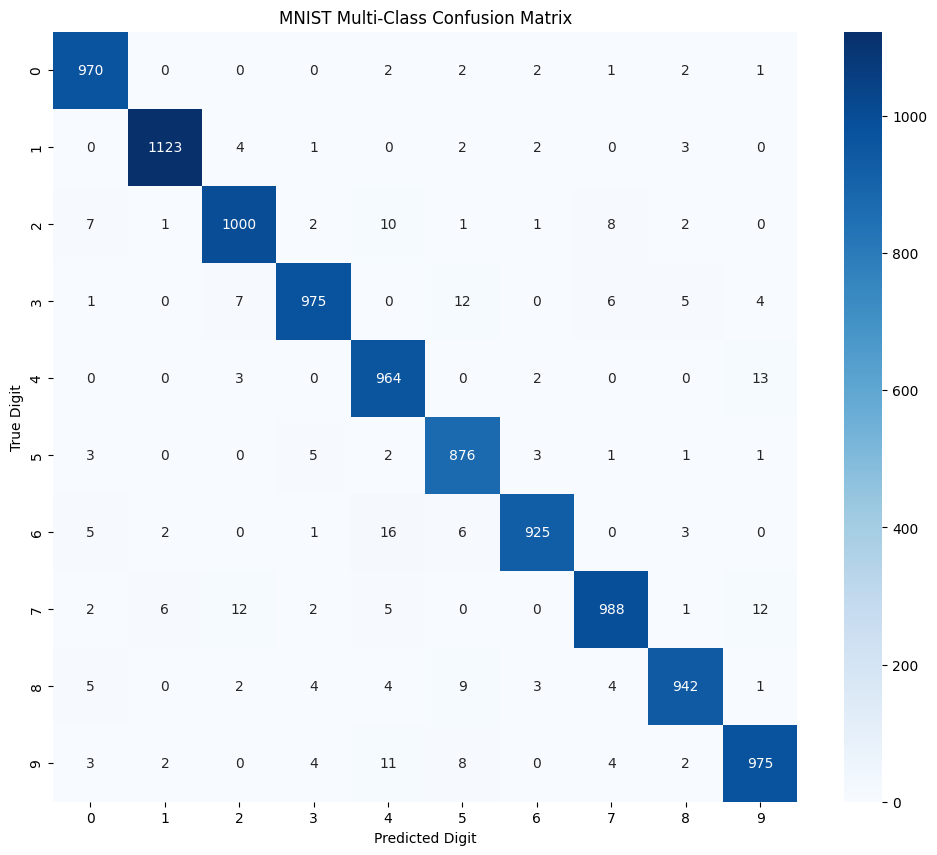

📊 MNIST Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.95      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



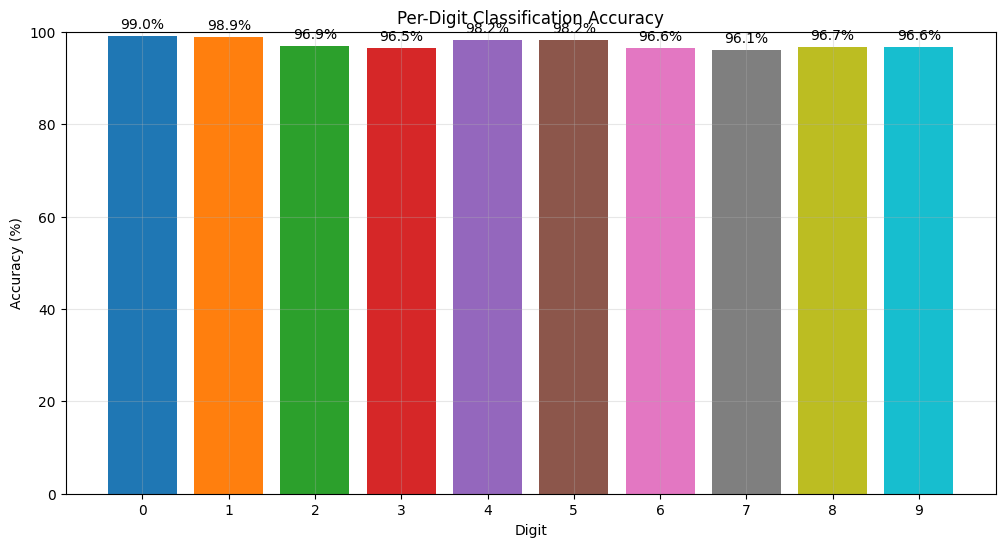

In [18]:
def evaluate_mnist_model(model, test_loader):
    """Comprehensive evaluation of MNIST model"""
    model.eval()
    all_predictions = []
    all_targets = []
    all_probabilities = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
    all_probabilities = np.array(all_probabilities)

    # Calculate accuracy
    accuracy = (all_predictions == all_targets).mean() * 100

    # Plot confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=range(10),
        yticklabels=range(10),
    )
    plt.title("MNIST Multi-Class Confusion Matrix")
    plt.xlabel("Predicted Digit")
    plt.ylabel("True Digit")
    plt.show()

    # Classification report

    print("📊 MNIST Classification Report:")
    print(
        classification_report(
            all_targets, all_predictions, target_names=[str(i) for i in range(10)]
        )
    )

    # Per-class accuracy
    per_class_acc = []
    for digit in range(10):
        mask = all_targets == digit
        if mask.sum() > 0:
            acc = (all_predictions[mask] == digit).mean() * 100
            per_class_acc.append(acc)
        else:
            per_class_acc.append(0)

    # Plot per-class accuracy
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(10), per_class_acc, color=plt.cm.tab10(range(10)))
    plt.title("Per-Digit Classification Accuracy")
    plt.xlabel("Digit")
    plt.ylabel("Accuracy (%)")
    plt.xticks(range(10))
    plt.ylim(0, 100)
    for i, acc in enumerate(per_class_acc):
        plt.text(i, acc + 1, f"{acc:.1f}%", ha="center", va="bottom")
    plt.grid(True, alpha=0.3)
    plt.show()

    return accuracy, cm, all_predictions, all_targets, all_probabilities


# Evaluate MNIST model
print("🔍 MNIST Model Comprehensive Evaluation")
print("=" * 50)
mnist_accuracy, mnist_cm, mnist_preds, mnist_targets, mnist_probs = (
    evaluate_mnist_model(mnist_model, test_loader)
)

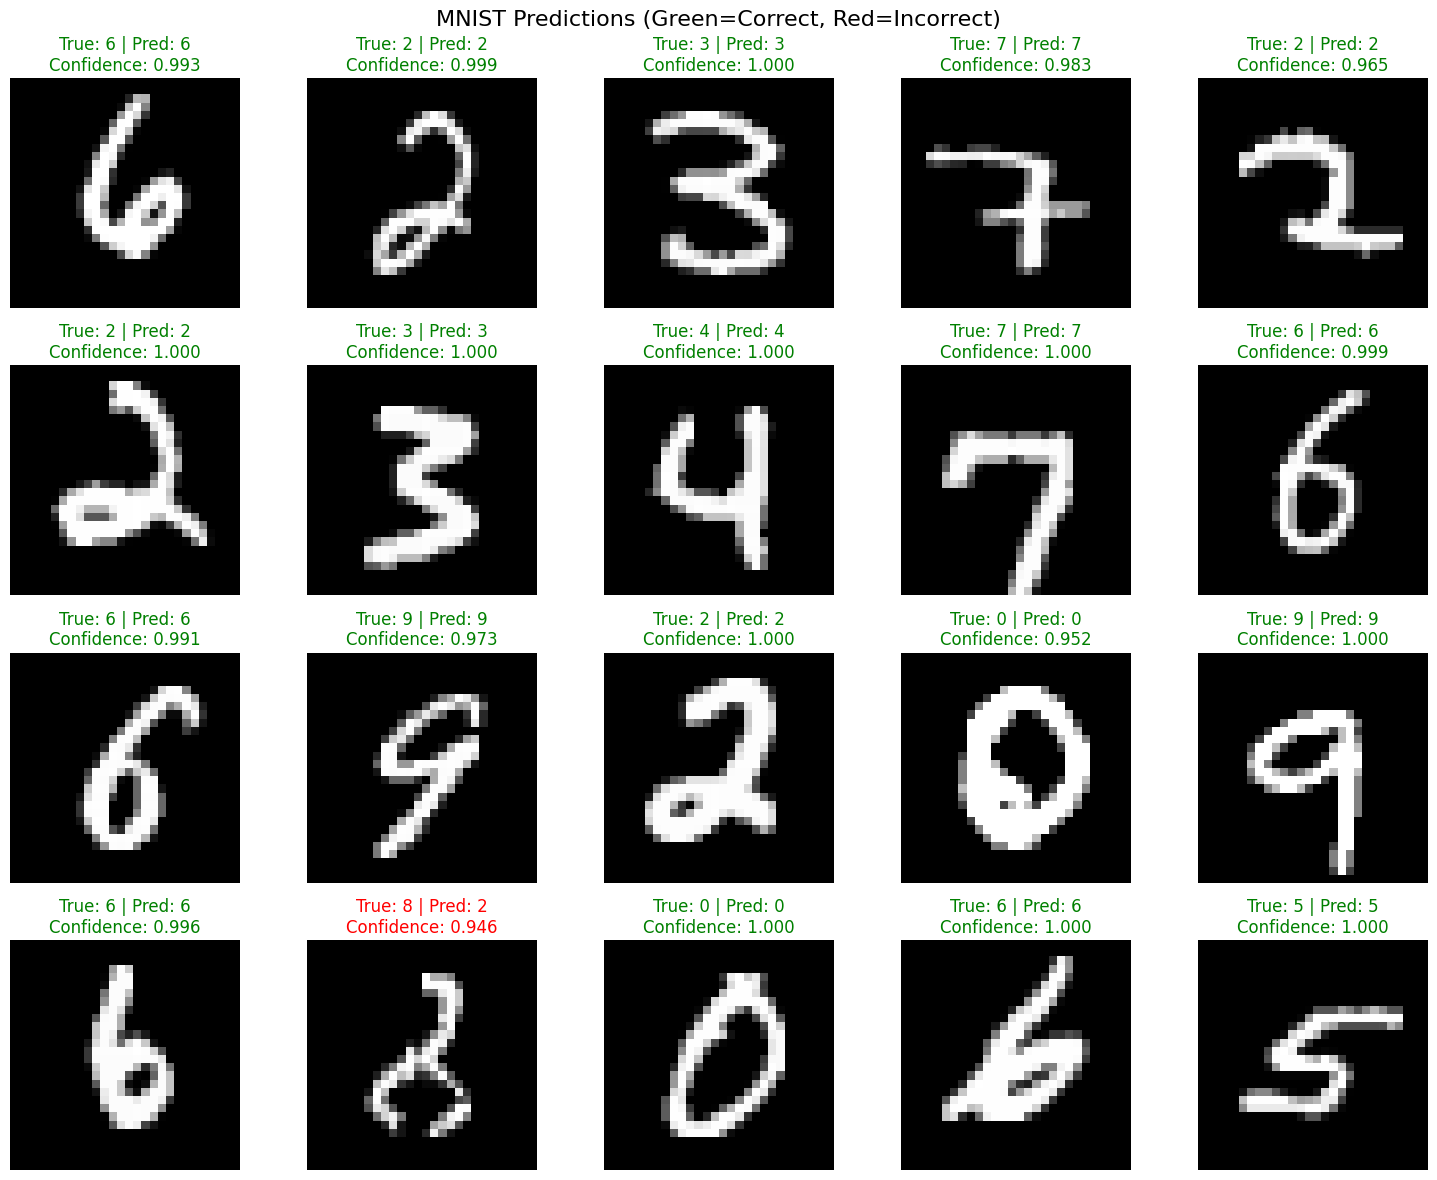

In [19]:
# Visualize some predictions
def visualize_mnist_predictions(model, test_dataset, n_samples=20):
    """Visualize model predictions on MNIST"""
    model.eval()

    # Get random samples
    indices = np.random.choice(len(test_dataset), n_samples, replace=False)

    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.ravel()

    with torch.no_grad():
        for i, idx in enumerate(indices):
            image, true_label = test_dataset[idx]
            image_batch = image.unsqueeze(0).to(device)

            # Get prediction
            output = model(image_batch)
            probabilities = F.softmax(output, dim=1)
            predicted_label = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0, predicted_label].item()

            # Plot
            axes[i].imshow(image.squeeze(), cmap="gray")
            color = "green" if predicted_label == true_label else "red"
            axes[i].set_title(
                f"True: {true_label} | Pred: {predicted_label}\n"
                f"Confidence: {confidence:.3f}",
                color=color,
            )
            axes[i].axis("off")

    plt.suptitle("MNIST Predictions (Green=Correct, Red=Incorrect)", fontsize=16)
    plt.tight_layout()
    plt.show()


# Visualize predictions
visualize_mnist_predictions(mnist_model, test_dataset)

## 🏆 Final Summary and Key Takeaways


In [20]:
# Create comprehensive summary
print("🏆 ENHANCED CLASSIFICATION SUMMARY")
print("=" * 70)

print("\n📊 BINARY CLASSIFICATION RESULTS:")
print("-" * 40)
print("🔵 Linear Model:")
print(f"  • Final Accuracy: {linear_history['test_acc'][-1]:.2f}%")
print(f"  • ROC-AUC: {linear_results['roc_auc']:.3f}")
print(f"  • F1-Score: {linear_results['metrics']['f1']:.3f}")

print("\n🔴 Non-Linear Model:")
print(f"  • Final Accuracy: {nonlinear_history['test_acc'][-1]:.2f}%")
print(f"  • ROC-AUC: {nonlinear_results['roc_auc']:.3f}")
print(f"  • F1-Score: {nonlinear_results['metrics']['f1']:.3f}")

print(
    f"\n📈 Improvement: {nonlinear_history['test_acc'][-1] - linear_history['test_acc'][-1]:.2f}% accuracy gain"
)

print("\n📊 MULTI-CLASS CLASSIFICATION (MNIST):")
print("-" * 40)
print(f"🎯 Final Test Accuracy: {mnist_accuracy:.2f}%")
print(f"📊 Total Parameters: {sum(p.numel() for p in mnist_model.parameters()):,}")

print("\n🎓 KEY INSIGHTS:")
print("-" * 40)
insights = [
    "🔄 Non-linear models can capture complex patterns that linear models cannot",
    "📊 Comprehensive metrics (precision, recall, F1) provide deeper insights than accuracy alone",
    "🎯 Confusion matrices reveal specific class-wise performance patterns",
    "📈 ROC curves help compare models and find optimal thresholds",
    "🌐 Multi-class problems require different loss functions (CrossEntropy vs BCE)",
    "⚖️ Different metrics matter for different applications (medical: recall, spam: precision)",
    "🎨 Decision boundary visualization helps understand model behavior",
    "📐 Model complexity should match problem complexity",
]

for insight in insights:
    print(f"  {insight}")

print("\n🚀 NEXT STEPS:")
print("-" * 40)
next_steps = [
    "🔧 Experiment with different architectures and hyperparameters",
    "⚖️ Handle class imbalance with techniques like weighted sampling",
    "🎯 Use appropriate metrics for your specific problem domain",
    "📊 Always visualize your data and model predictions",
    "🔍 Monitor for overfitting with validation curves",
    "🌐 Try transfer learning for complex image classification",
    "📈 Consider ensemble methods for improved performance",
    "🎨 Explore advanced techniques like attention mechanisms",
]

for step in next_steps:
    print(f"  {step}")

print("\n✅ Enhanced Classification Complete! 🎉")

🏆 ENHANCED CLASSIFICATION SUMMARY

📊 BINARY CLASSIFICATION RESULTS:
----------------------------------------
🔵 Linear Model:
  • Final Accuracy: 48.00%
  • ROC-AUC: 0.490
  • F1-Score: 0.485

🔴 Non-Linear Model:
  • Final Accuracy: 82.00%
  • ROC-AUC: 0.916
  • F1-Score: 0.836

📈 Improvement: 34.00% accuracy gain

📊 MULTI-CLASS CLASSIFICATION (MNIST):
----------------------------------------
🎯 Final Test Accuracy: 97.38%
📊 Total Parameters: 242,762

🎓 KEY INSIGHTS:
----------------------------------------
  🔄 Non-linear models can capture complex patterns that linear models cannot
  📊 Comprehensive metrics (precision, recall, F1) provide deeper insights than accuracy alone
  🎯 Confusion matrices reveal specific class-wise performance patterns
  📈 ROC curves help compare models and find optimal thresholds
  🌐 Multi-class problems require different loss functions (CrossEntropy vs BCE)
  ⚖️ Different metrics matter for different applications (medical: recall, spam: precision)
  🎨 Decision

## 🎯 Practice Exercises

Try these exercises to deepen your understanding:

### 🔥 Beginner Exercises

1. **Modify Architecture**: Change the number of hidden units in the non-linear model and observe the effect on performance
2. **Learning Rate**: Experiment with different learning rates (0.001, 0.01, 0.1) and plot the training curves
3. **Activation Functions**: Try different activation functions (Tanh, LeakyReLU, GELU) instead of ReLU

### 🌟 Intermediate Exercises

4. **Class Imbalance**: Create an imbalanced version of the circles dataset and implement weighted loss functions
5. **Early Stopping**: Implement early stopping to prevent overfitting
6. **Cross-Validation**: Implement k-fold cross-validation for more robust evaluation

### 🚀 Advanced Exercises

7. **Custom Metrics**: Implement your own metrics like Matthews Correlation Coefficient
8. **Ensemble Methods**: Create an ensemble of multiple models and combine their predictions
9. **Hyperparameter Tuning**: Use techniques like grid search or Bayesian optimization to find optimal hyperparameters

### 🏆 Challenge Exercises

10. **Real Dataset**: Apply these techniques to a real-world dataset like Wine Quality or Breast Cancer Wisconsin
11. **Multi-Label Classification**: Modify the MNIST example for multi-label classification (multiple digits per image)
12. **Interactive Dashboard**: Create an interactive visualization dashboard for model comparison

Remember: The best way to learn is by doing! 🚀
